# --------    Groupby    --------

pandas groupby() allows you to group "rows of data" together and call aggregate functions

In [1]:
# Create dataframe, from a dictionary
import pandas as pd
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


in this DataFrame we have the companies: Google, Microsoft and FaceBook, name of different people & their sales

In [2]:
# groupby(): now we group the rows based-on of a column name
# groupby "company":
df.groupby('Company')
# it'll  create a groupby object, stored in a memory:  <pandas.core.groupby.DataFrameGroupBy object at <sEftislsK015E8B8C36D8>

In [2]:
# we can apply an aggregate function as below
byComp = df.groupby('Company')
byComp.mean()   # looks at "Sales" and give us the "mean"

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


## applying other aggrigate functions

#### pandas automatically ignores "non-numeric" columns
    # it applies mean() to all the columns that have "numerical values"
    # notice "Person" isn't counted because these are strings

In [4]:
# applying other aggrigate functions
byComp.sum()    # sum

,Sales
Company,
FB,593
GOOG,320
MSFT,464


In [5]:
byComp.std()    # standared deviations

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [6]:
# notice, it outputs a DataFrame
    # so we can access the row of 'FB'
byComp.sum().loc['FB']

Sales    593
Name: FB, dtype: int64

In [7]:
# most of the time we'll do that in one line of code:
df.groupby('Company').sum().loc['FB']

Sales    593
Name: FB, dtype: int64

In [8]:
# counts: counts noumber of instences for column
df.groupby('Company').count()
# notice "Person" is appeared, because "strings" are countable

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [9]:
# max, min
df.groupby('Company').max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


#### also notice "Person", but in this case its maxed according to "alphabetical order"

In [10]:
df.groupby('Company').min()
# so in this case we need to avoid "Person"
    # it's not a good idea to use max, min on a string column

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [11]:
# describe: its very useful for analyzing data-set
    # gives bunch-of information all at once
    # such as: count, mean, std, min, max, quartiles
df.groupby('Company').describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [12]:
# we can transpose it for better view (columns become rows)
df.groupby('Company').describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [2]:
# we can also call the column names of this transpose matrix
df.groupby('Company').describe().transpose()['FB']

Sales  count      2.000000
       mean     296.500000
       std       75.660426
       min      243.000000
       25%      269.750000
       50%      296.500000
       75%      323.250000
       max      350.000000
Name: FB, dtype: float64

___

# ------------    Merging Joining and Concatenating    ------------

    # combine DataFrames using different methods
    # There are 3 main ways of combining DataFrames together: 
            # Merging, 
            # Joining and 
            # Concatenating.


In [3]:
# Example DataFrames
import pandas as pd

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                        index=[4, 5, 6, 7]) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

print(df1)
print(df2)
print(df3)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


## --------    concatenation    -------- 

In [4]:
# It glues together DataFrames
    # DIMENSIONs should match along the axis you are concatenating on. 
    # use-    pd.concat(list of DataFrames)
    # by Default, axis to join on is 0, i.e. it joins "row-wise"
pd.concat([df1, df2, df3])    # concate row-wise

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [5]:
# axis = 1: concate column-wise
    # the DataFrames are placed diagonally in a bigger matrix
    # all other elements are "NaN"
pd.concat([df1, df2, df3], axis = 1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


## --------    Merging    -------- 
    # using "merge logic" is similar to 'merging SQL tables' togather

In [1]:
# let's create two more "Example DataFrames"
import pandas as pd

lEft = pd.DataFrame( {'key': ['K0', 'K1', 'K2', 'K3'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
   
riGht = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})    

print(lEft)
print(riGht)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


#### Notice, both have a COMMON column 'key'

#### The merge() function allows you to merge DataFrames together 
    # using a similar logic as merging SQL Tables together. For example:


#### pd.merge(df1, df2, how='inner', on='col_name')
    # by defaulet, how='inner'
    # on: merge on a key-column, you can pass one or more key-column
    # we merge/combine those DataFrames w.r to those key-colums

In [2]:
pd.merge(lEft, riGht, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


#### just concatination will result repeated key-columns
#### By merging we are joining the DataFrames on the common key-column they share
    # when we merge, insted of gluing the DataFrames, 
    # we're looking for which values to match up on the key-column
    # then it creates the rows using that key-column

### ----  multiple key-columns  ----

In [2]:

import pandas as pd

lEft2 = pd.DataFrame( { 'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
   
riGht2 = pd.DataFrame({ 'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})    

print(lEft2)
print(riGht2)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


In [2]:

# notice: lEft2, riGht2 has 2 key-columns 'key1' and 'key2' but they have different elemnts
#  to use multiple key-columns, use the list for 'on='

pd.merge(lEft2, riGht2, on=['key1', 'key2'])       # how='inner' is default 

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


### SQL syntax: inner, outer, right, left
    # notice the MISSING values
    # most of the time in PANDAS we'll use "inner" join

In [3]:
# merge OUTER
pd.merge(lEft2, riGht2, how="outer", on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [4]:
# merge RIGHT
pd.merge(lEft2, riGht2, how="right", on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [5]:
# merge LEFT
pd.merge(lEft2, riGht2, how="left", on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


___

## --------    Joining    -------- 
    # combines the columns of two potentially "differently-indexed DataFrames" 
        # into a single result DataFrame.

    # it's similar to merge but the "keys" to join is 'index' instead of 'columns' 


In [6]:
# notice the "index" are different 

left3 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right3 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

print(left3)
print(right3)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [7]:
# autometically  inner-join, based on the key "index"
    # NOTE: use 'merge' to join them based on of columns
left3.join(right3)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [8]:
# we can also set 'how' attribute
left3.join(right3, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


___

# ----------------    OPERATIONS    ----------------
    # useful operations in pandas

In [1]:
# Creating DataFrame
import numpy as np 
import pandas as pd

dfo = pd.DataFrame({ 'col1':[1,2,3,4],
                    'col2':[444,555,666,444],
                    'col3':['abc', 'def','ghi','xyz']})
dfo.head()

# notice '444' is repeated

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### find "uniques"
    # there are 3 methods
#### ----  unique(), nunique()  ----    

In [6]:
# all the uniques in a col
dfo['col2'].unique()       # numpy-array of all uniques in 'col2'

array([444, 555, 666], dtype=int64)

In [7]:
# number of unique-values
len(dfo['col2'].unique())

3

In [8]:
dfo['col2'].nunique()  # gives same result

3

#### ----  value_counts()  ----

In [9]:
# how many times each unique-value shows up in a DataFrame
dfo['col2'].value_counts()
# no. of appearnce of unique values in 'col2'

444    2
555    1
666    1
Name: col2, dtype: int64

#### --------  selecting data  --------

In [2]:
# use conditional-selection
dfo[dfo['col1']>2]

,col1,col2,col3
2,3,666,ghi
3,4,444,xyz


In [3]:
dfo['col1']>2   # just a Boolian-Series

0    False
1    False
2     True
3     True
Name: col1, dtype: bool

In [4]:
# using joint conditions
dfo[(dfo['col1']>2) & (dfo['col2']==444)]

,col1,col2,col3
3,4,444,xyz


#### ----  apply()  ----
#### it applys a "custom-function", "built-in function", "LAMBDA"
    # apply(function_name)
    # NOTICE: no '()' is used with "function_name"
    # it broadcast that function to each element of that column
    # it's one of the most powerfull tools in pandas


In [5]:
def times2(x):
    return x*2

dfo["col2"].apply(times2)

0     888
1    1110
2    1332
3     888
Name: col2, dtype: int64

In [6]:
# apply "builtin-functions"
dfo["col3"].apply(len)  
# applying "len" to return the length of each string

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

#### ----  apply() with "LAMBDA expression"  ----

In [7]:
# instead of defining whole function we can use LAMBDAS
dfo["col2"].apply(lambda x: x*2)

0     888
1    1110
2    1332
3     888
Name: col2, dtype: int64

### ----  removing columns  ----

In [2]:
# need to specify the axis (col / row)
print(dfo)
# remove column 1
dfo.drop("col1", axis=1)
# use "inplae=True" to make the change parmanent

   col1  col2 col3
0     1   444  abc
1     2   555  def
2     3   666  ghi
3     4   444  xyz


,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


### ----   col / index names   ----

In [3]:
# get the column names
dfo.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [4]:
# get the index names
dfo.index
# if the index is numerical (similar to 'range'), start, stop, step-size are shown

RangeIndex(start=0, stop=4, step=1)

### ----   sorting / ordering   ----

In [6]:
# sort by col2: dfo.sort_values(by='column_name')
# notice the index is changed (they're attached to the rows)
dfo.sort_values(by='col2')

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


### ----  find Null  ----

In [7]:
# find "Null" values in a DataFrame: returns "Boolian DataFrame"
dfo.isnull()

,col1,col2,col3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


### ----  PIVOT table  ----

In [1]:
# it's familier to advanced excel-users

# let's define a new DataFrame
import pandas as pd

data = {'A':['foo','foo','foo','bar','bar','bar'],
        'B':['one','one','two','two','one','one'],
        'C':['x','y','x','y','x','y'],
        'D':[1,3,2,5,4,1]
        }

dfpv = pd.DataFrame(data)

In [3]:
# Notice the repeating values in columns: A, B, C, D
# We'll create a "multi-index DataFrame" from this table
dfpv

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [6]:
# we'll use: pd.pivot_table(values, index, columns)
    # lets consider column 'D' is the value
    # columns 'A'. 'B' are the multi-layer-index
    # also consider 'C' be the actual column, 
        # we'll get one column for x and another for y
dfpv.pivot_table(values='D', index=['A', 'B'], columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

In [7]:
# notice 'C' is in a list
# also notice the 'NaN' values, because
    # there's no value for ('bar', 'two', 'x')
    # there is no value for ('foo', 'two', 'y')

___

# ------------    Data I/O    ------------
    # How to input data from files
    # How to save data in a file

### ----  Data file types and sources  ----
    # CSV
    # Excel
    # HTML
    # SQL

### in order to work with HTML and SQL, use following librariees


    We can install with "pip" or "conda"

        conda install sqlalchemy
        conda install lxml 
        conda install html5lib 
        conda install BeautifulSoup4


In [ ]:
# Put the XML or CSV files to your current "working directory" / location
# to get the location of current "working directory":
pwd

## ----  open and read CSV files  ----

In [2]:
import pandas as pd
# pd.read_csv()
df_x = pd.read_csv('z_prTla_example')

In [6]:
df_x

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


#### Notice: we didn't use any ".csv" extension because our file doesn't have any file extension
    most of the time a CSV file has .csv extension, in that case we must use that in read_csv()

            df_x = pd.read_csv('z_prTla_example.csv')

### other read functions from Pandas
        pd.read_json
        pd.read_pickle
        pd.read_csv
        pd.read_excel
        pd.read_clipboard
        pd.read_sql
        pd.read_table

In [3]:
# write a csv file
data = {'A':['foo','foo','foo','bar','bar','bar'],
        'B':['one','one','two','two','one','one'],
        'C':['x','y','x','y','x','y'],
        'D':[1,3,2,5,4,1]
        }

dfw = pd.DataFrame(data)
dfw

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [4]:
dfw.to_csv("my_output.csv", index=False)
# we set "index=False", because we don't want to save the indeex as a column
df_x = pd.read_csv('my_output.csv')
# Notice the use of ".csv" in both write-read
df_x

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


#### why we use "index=False"

In [ ]:
dfw.to_csv("my_output_2")
# notice the index is saved as "Unnamed" column
df_x2 = pd.read_csv('my_output_2')
df_x2

### other write functions from Pandas (similar to read fumctions)

        pd.to_json
        pd.to_pickle
        pd.to_csv
        pd.to_excel
        pd.to_clipboard
        pd.to_sql



## ----  open and read excel file  ----
### read/write an excel file
    # pandas only works with data 
    # not with images, formulas or macros
    # trying to do that may crash pandas

    We can use following librarry also
        pip install xlrd

    a workbook is bunch of sheets and 
    each sheet is a DataFrame


In [1]:
# read_excel()
import pandas as pd
# pd.read_excel(path, sheetname=)
pd.read_excel("./z_prTla_Excel_Sample.xlsx", sheet_name="Sheet1")
# pd.read_excel('z_prTla_Excel_Sample.xlsx', 'Sheet1')

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [4]:
# write to excel(): 
# pdObject.to_excel(path, sheetname=)
dfw.to_excel("./Excel_Sample2.xlsx", sheet_name='NewSheet')
# notice we used the pandas-DataFrame object "dfw" instead of "pd"

## ----  working with "HTML"  ----
    # we need to install libraries: 
    pip install html5lib

In [2]:
# Failed Bank List: FDIC - Federal Deposit Insurance Corporation
# its an HTML link: https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/index.html

dataHtml = pd.read_html("https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/index.html")

In [3]:
# Note that it isn't directly relate to a DataFrame, it's in a List form
type(dataHtml)

list

In [4]:
dataHtml[0]

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association","April 26, 2024",10546
1,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,"November 3, 2023",10545
2,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.","July 28, 2023",10544
3,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.","May 1, 2023",10543
4,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.","March 12, 2023",10540
...,...,...,...,...,...,...,...
564,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
565,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
566,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
567,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646


In [5]:
# let's explore
dataHtml[0].head()
# notice some NaN values

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association","April 26, 2024",10546
1,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,"November 3, 2023",10545
2,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.","July 28, 2023",10544
3,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.","May 1, 2023",10543
4,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.","March 12, 2023",10540


## ----  Working with SQL  ----
    # pandas isn't actually good for SQL database
    # there's many SQL engines:
        # PostgreSQL
        # MySQL
        # SQLite

### We'll built very basic SQL engine, that temporarily held in memory
### we'll use pandas to read tables as DataFrame
### we need to use specific driver to use specific SQL engine
    # if we're using PostgreSQL, we need to use library called "psycopg2"
        # psycopg is the most popular PostgreSQL database library for the Python
    # if we're using "MySQL" we need to use "PyMySQL" library

In [2]:
# create a very simple sql engine in memory
from sqlalchemy import create_engine
import pandas as pd

In [4]:
# read/write a csv file
data = {'A':['foo','foo','foo','bar','bar','bar'],
        'B':['one','one','two','two','one','one'],
        'C':['x','y','x','y','x','y'],
        'D':[1,3,2,5,4,1]
        }
dfw = pd.DataFrame(data)
dfw

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [3]:
# create a very temporary, small "sqlite" engine, database that's running in memory
# notice "///" 3-slash
engine = create_engine("sqlite:///:memory:")

In [7]:
# write the DataFrame to the DB (temporary engine running in the memory)
# dfw.to_sql(table_name, con=engine_name); "con" is connection
dfw.to_sql("my_table", con=engine)

6

In [8]:
# read the table: pd.read_sql(table, engine.connect())
sqlDF = pd.read_sql('my_table', con=engine.connect())
sqlDF
# notice "index" is in new column
# Note: we need to use create_engine.connect() to connect the database

,index,A,B,C,D
0,0,foo,one,x,1
1,1,foo,one,y,3
2,2,foo,two,x,2
3,3,bar,two,y,5
4,4,bar,one,x,4
5,5,bar,one,y,1


In [9]:
# To properly close or "turn off" the SQLite engine running in memory, 
    # you need to dispose of the connection. 
    # This will release any resources associated with the engine.

# After you're done using the engine
engine.dispose()

### ----  Re-run above code  ----

In [10]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

# read/write a csv file
data = {'A':['foo','foo','foo','bar','bar','bar'],
        'B':['one','one','two','two','one','one'],
        'C':['x','y','x','y','x','y'],
        'D':[1,3,2,5,4,1]
        }
dfw = pd.DataFrame(data)
print(dfw)
print("\n-------------------------------")

# create a very temporary, small "sqlite" engine, database that's running in memory
# notice "///" 3-slash
engn = create_engine("sqlite:///:memory:")
dfw.to_sql("my_table", engn)

# pd.read_sql(table, engine.connect())
df = pd.read_sql("my_table", con=engn.connect())
# Note: we need to use create_engine.connect() to connect the database
print(df)

engn.dispose()  # "turn off" the SQLite engine

     A    B  C  D
0  foo  one  x  1
1  foo  one  y  3
2  foo  two  x  2
3  bar  two  y  5
4  bar  one  x  4
5  bar  one  y  1

-------------------------------
   index    A    B  C  D
0      0  foo  one  x  1
1      1  foo  one  y  3
2      2  foo  two  x  2
3      3  bar  two  y  5
4      4  bar  one  x  4
5      5  bar  one  y  1


___

# --------  correlation: corr()  --------

In [1]:
# What is pandas.DataFrame.corr()?

"""  
    The corr() function in Pandas is used to compute the "pairwise correlation of columns" in a DataFrame. 
    CORRELATION measures the statistical relationship between two variables, with the result being a number between -1 and 1:

        1:   Perfect positive correlation. As one variable increases, the other also increases.
        0:   No correlation. The variables do not have a linear relationship.
       -1:   Perfect negative correlation. As one variable increases, the other decreases.


    By default, corr() uses the "Pearson correlation coefficient", which measures linear relationships. 
        However, Pandas also supports other methods like: 

            "Kendall's tau τ" (Kendall rank correlation coefficient) and 
            "Spearman's rho ρ" (Spearman's rank correlation coefficient) 

        by specifying the method parameter.


    Syntax:

            DataFrame.corr(method='pearson', min_periods=1)


    method: Method of correlation:
        'pearson': Standard correlation coefficient (default).
        'kendall': Kendall Tau correlation coefficient.
        'spearman': Spearman rank correlation coefficient.
        min_periods: Minimum number of observations required per pair of columns to have a valid result.

"""


# Example: following is the demo of cor()
import pandas as pd

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [2, 4, 6, 8, 10],
    'C': [5, 6, 7, 8, 7],
    'D': [10, 8, 6, 4, 2]
}

df = pd.DataFrame(data)

# Calculate pairwise correlation
correlation_matrix = df.corr()
print(correlation_matrix)

         A        B        C        D
A  1.00000  1.00000  0.83205 -1.00000
B  1.00000  1.00000  0.83205 -1.00000
C  0.83205  0.83205  1.00000 -0.83205
D -1.00000 -1.00000 -0.83205  1.00000


In [ ]:
""" 
    Output Explanation:

                    A         B         C         D
            A  1.000000  1.000000  0.832050 -1.000000
            B  1.000000  1.000000  0.832050 -1.000000
            C  0.832050  0.832050  1.000000 -0.832050
            D -1.000000 -1.000000 -0.832050  1.000000


    In the output:

        Columns A and B have a perfect positive correlation (1.000)
        Columns A and D have a perfect negative correlation (-1.000)
        Columns A and C have a moderate positive correlation (0.832)

"""

In [ ]:
# How to Determine if There is Correlation in a Dataset?
""" 
    Visual Inspection: 
        Plot the data using scatter plots. 
        If the points form a 'line' or a 'clear pattern', there is likely some correlation.

        Calculate Correlation Coefficient: 
            Use df.corr() to calculate the correlation matrix:
            Look for values close to 1 or -1 for strong correlations.
            Values close to 0 indicate weak or no linear correlation.
        
        Heatmaps: 
            Use a heatmap to visualize the correlation matrix for a quick overview.



    Statistical Tests: 
        For more complex datasets, use statistical tests (like Pearson, Spearman, or Kendall) to validate correlations. 
        These tests provide 'p-values' to indicate the 'significance' of the correlation.

        Interpreting Correlation:
                Strong Correlation: |r| > 0.7
                Moderate Correlation: 0.3 < |r| < 0.7
                Weak or No Correlation: |r| < 0.3
        
            The closer the absolute value of the correlation coefficient is to 1, the stronger the correlation between the variables.

"""

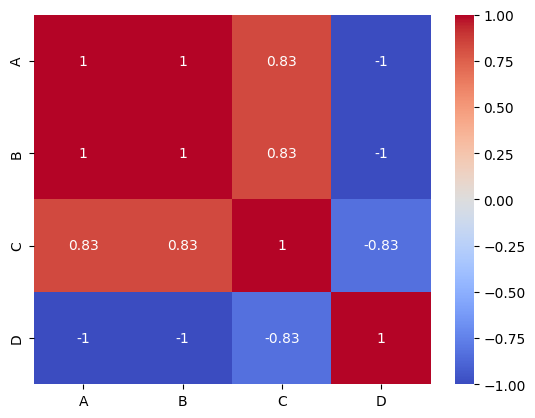

In [2]:
# Example: Visualize using previous "demo of cor()"

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()